# JSON and XML - Lab

## Introduction

In this lab, we'll continue investigating new formats for datasets. Specifically, we'll investigate two of the most popular data formats for the web: JSON and XML including strenghts and weaknesses.

## Objectives
You will be able to:
* Effectively use the JSON module to load and parse JSON documents
* Read and access data stored in JSON and XML
* Compare  and contrast the JSON and XML as data interchange types


## XML

In [2]:
import xml.etree.ElementTree as ET

### Create an XML tree and retrieve the root tag.

In [8]:
tree = ET.parse('nyc_2001_campaign_finance.xml')
root = tree.getroot()

### How many direct descendents does the root tag have?

In [7]:
count = 0 
for child in root:
    count += 1
print(count)

#Answer: 1

1


### How many different types of tags are there within the entire XML file?

In [6]:
element_tags = []
for element in root.iter():
    element_tags.append(element.tag)
print(len(set(element_tags)))

13


### Create a DataFrame listing the number of each type of tag. 
Sort the DataFrame in descending order by the tag count. The first entry should demonstrate there are 286 row tags in the XML file.   
(Your DataFrame will be a single column, so could also be thought of as a Series.)

In [9]:
import pandas as pd

In [10]:
element_tags = {}
for element in root.iter():
    element_tags[element.tag] = element_tags.get(element.tag, 0) + 1
df = pd.DataFrame.from_dict(element_tags, orient='index')
df.columns = ['count']
df = df.sort_values(by='count', ascending=False)
df.head()

,count
row,286
candid,285
candname,285
canclass,285
election,284


## JSON

### Open the same dataset from json

In [11]:
import json
f = open('nyc_2001_campaign_finance.json')
data = json.load(f)

### What is the root data type of the json file?

In [12]:
type(data)

dict

### Navigate to the 'data' key of your loaded json object. What data type is this?

In [13]:
type(data['data'])

list

### Preview the first entry from the value returned by the 'data' key above.

In [14]:
data['data'][0]

[1,
 'E3E9CC9F-7443-43F6-94AF-B5A0F802DBA1',
 1,
 1315925633,
 '392904',
 1315925633,
 '392904',
 '{\n  "invalidCells" : {\n    "1519001" : "TOTALPAY",\n    "1518998" : "PRIMARYPAY",\n    "1519000" : "RUNOFFPAY",\n    "1518999" : "GENERALPAY",\n    "1518994" : "OFFICECD",\n    "1518996" : "OFFICEDIST",\n    "1518991" : "ELECTION"\n  }\n}',
 None,
 'CANDID',
 'CANDNAME',
 None,
 'OFFICEBORO',
 None,
 'CANCLASS',
 None,
 None,
 None,
 None]

### Preview the Entry under meta -> view -> columns (the keys of three successively nested dictionaries)

In [15]:
data['meta']['view']['columns']

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

### Create a DataFrame from your json data
The previous two questions previewed one entry from the data object within the json file, as well as the column details associated with that data from the meta entry within the json file. Both should have 19 entries. Create a DataFrame of the data. Be sure to use the information from the meta entry to add appropriate column names to your DataFrame.

In [16]:
df = pd.DataFrame(data['data'])
cols = [i['name'] for i in data['meta']['view']['columns']]
df.columns = cols
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,ELECTION,CANDID,CANDNAME,OFFICECD,OFFICEBORO,OFFICEDIST,CANCLASS,PRIMARYPAY,GENERALPAY,RUNOFFPAY,TOTALPAY
0,1,E3E9CC9F-7443-43F6-94AF-B5A0F802DBA1,1,1315925633,392904,1315925633,392904,"{\n ""invalidCells"" : {\n ""1519001"" : ""TOTA...",None,CANDID,CANDNAME,None,OFFICEBORO,None,CANCLASS,None,None,None,None
1,2,9D257416-581A-4C42-85CC-B6EAD9DED97F,2,1315925633,392904,1315925633,392904,{\n},2001,B4,"Aboulafia, Sandy",5,None,44,P,45410.00,0,0,45410.00
2,3,B80D7891-93CF-49E8-86E8-182B618E68F2,3,1315925633,392904,1315925633,392904,{\n},2001,445,"Adams, Jackie R",5,None,7,P,11073.00,0,0,11073.00
3,4,BB012003-78F5-406D-8A87-7FF8A425EE3F,4,1315925633,392904,1315925633,392904,{\n},2001,HF,"Addabbo, Joseph P",5,None,32,P,75350.00,73970.00,0,149320.00
4,5,945825F9-2F5D-47C2-A16B-75B93E61E1AD,5,1315925633,392904,1315925633,392904,{\n},2001,IR,"Alamo-Estrada, Agustin",5,None,14,P,25000.00,2400.00,0,27400.00


In [19]:
len(df)

285

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 19 columns):
sid             285 non-null int64
id              285 non-null object
position        285 non-null int64
created_at      285 non-null int64
created_meta    285 non-null object
updated_at      285 non-null int64
updated_meta    285 non-null object
meta            285 non-null object
ELECTION        284 non-null object
CANDID          285 non-null object
CANDNAME        285 non-null object
OFFICECD        284 non-null object
OFFICEBORO      21 non-null object
OFFICEDIST      245 non-null object
CANCLASS        285 non-null object
PRIMARYPAY      284 non-null object
GENERALPAY      284 non-null object
RUNOFFPAY       284 non-null object
TOTALPAY        284 non-null object
dtypes: int64(4), object(15)
memory usage: 42.4+ KB


In [21]:
df.describe()

,sid,position,created_at,updated_at
count,285.000000,285.000000,2.850000e+02,2.850000e+02
mean,143.000000,143.000000,1.315926e+09,1.315926e+09
std,82.416625,82.416625,0.000000e+00,0.000000e+00
min,1.000000,1.000000,1.315926e+09,1.315926e+09
25%,72.000000,72.000000,1.315926e+09,1.315926e+09
50%,143.000000,143.000000,1.315926e+09,1.315926e+09
75%,214.000000,214.000000,1.315926e+09,1.315926e+09
max,285.000000,285.000000,1.315926e+09,1.315926e+09


In [22]:
df.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'ELECTION', 'CANDID', 'CANDNAME', 'OFFICECD',
       'OFFICEBORO', 'OFFICEDIST', 'CANCLASS', 'PRIMARYPAY', 'GENERALPAY',
       'RUNOFFPAY', 'TOTALPAY'],
      dtype='object')

In [33]:
df.TOTALPAY = df.TOTALPAY.astype('str')

In [36]:
df.TOTALPAY.unique()

array(['None', '45410.00', '11073.00', '149320.00', '27400.00',
       '62990.00', '0', '36801.00', '88736.00', '69816.00', '150520.00',
       '75350.00', '356723.00', '90262.00', '92498.00', '47820.00',
       '108226.00', '1576860.00', '19520.00', '51676.00', '37312.00',
       '65704.00', '150700.00', '66304.00', '73868.00', '431802.00',
       '21292.00', '49572.00', '29444.00', '164123.00', '166683.00',
       '77922.00', '147160.00', '71388.00', '145096.00', '122382.00',
       '142885.00', '94946.00', '1336655.00', '80904.00', '65048.00',
       '316548.00', '55900.00', '2871933.00', '142141.00', '444452.00',
       '135904.00', '647350.00', '39476.00', '131798.00', '52968.00',
       '91333.00', '626484.00', '521969.00', '48480.00', '146314.00',
       '165783.00', '148266.00', '19900.00', '71940.00', '1625090.00',
       '27320.00', '4534230.00', '78932.00', '596045.00', '147626.00',
       '90908.00', '10976.00', '2641247.00', '124753.00', '25020.00',
       '142973.00', '51

In [37]:
df[df.TOTALPAY == 'None']

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,ELECTION,CANDID,CANDNAME,OFFICECD,OFFICEBORO,OFFICEDIST,CANCLASS,PRIMARYPAY,GENERALPAY,RUNOFFPAY,TOTALPAY
0,1,E3E9CC9F-7443-43F6-94AF-B5A0F802DBA1,1,1315925633,392904,1315925633,392904,"{\n ""invalidCells"" : {\n ""1519001"" : ""TOTA...",None,CANDID,CANDNAME,None,OFFICEBORO,None,CANCLASS,None,None,None,None


In [39]:
df.index

RangeIndex(start=0, stop=285, step=1)

In [40]:
df = df.drop(0)
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,ELECTION,CANDID,CANDNAME,OFFICECD,OFFICEBORO,OFFICEDIST,CANCLASS,PRIMARYPAY,GENERALPAY,RUNOFFPAY,TOTALPAY
1,2,9D257416-581A-4C42-85CC-B6EAD9DED97F,2,1315925633,392904,1315925633,392904,{\n},2001,B4,"Aboulafia, Sandy",5,None,44,P,45410.00,0,0,45410.00
2,3,B80D7891-93CF-49E8-86E8-182B618E68F2,3,1315925633,392904,1315925633,392904,{\n},2001,445,"Adams, Jackie R",5,None,7,P,11073.00,0,0,11073.00
3,4,BB012003-78F5-406D-8A87-7FF8A425EE3F,4,1315925633,392904,1315925633,392904,{\n},2001,HF,"Addabbo, Joseph P",5,None,32,P,75350.00,73970.00,0,149320.00
4,5,945825F9-2F5D-47C2-A16B-75B93E61E1AD,5,1315925633,392904,1315925633,392904,{\n},2001,IR,"Alamo-Estrada, Agustin",5,None,14,P,25000.00,2400.00,0,27400.00
5,6,9546F502-39D6-4340-B37E-60682EB22274,6,1315925633,392904,1315925633,392904,{\n},2001,BR,"Allen, William A",5,None,9,P,62990.00,0,0,62990.00


In [42]:
df.TOTALPAY = df.TOTALPAY.astype('float')

(array([266.,   8.,   4.,   2.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([      0.,  453423.,  906846., 1360269., 1813692., 2267115.,
        2720538., 3173961., 3627384., 4080807., 4534230.]),
 <a list of 10 Patch objects>)

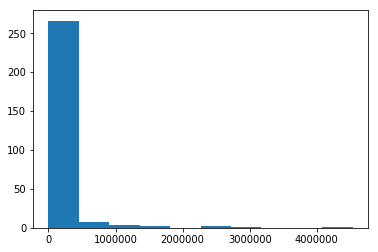

In [44]:
import matplotlib.pyplot as plt

plt.hist(df.TOTALPAY)

In [51]:
df_remove_0 = df[df.TOTALPAY != 0]
df_remove_0.TOTALPAY.unique()

array([  45410.,   11073.,  149320.,   27400.,   62990.,   36801.,
         88736.,   69816.,  150520.,   75350.,  356723.,   90262.,
         92498.,   47820.,  108226., 1576860.,   19520.,   51676.,
         37312.,   65704.,  150700.,   66304.,   73868.,  431802.,
         21292.,   49572.,   29444.,  164123.,  166683.,   77922.,
        147160.,   71388.,  145096.,  122382.,  142885.,   94946.,
       1336655.,   80904.,   65048.,  316548.,   55900., 2871933.,
        142141.,  444452.,  135904.,  647350.,   39476.,  131798.,
         52968.,   91333.,  626484.,  521969.,   48480.,  146314.,
        165783.,  148266.,   19900.,   71940., 1625090.,   27320.,
       4534230.,   78932.,  596045.,  147626.,   90908.,   10976.,
       2641247.,  124753.,   25020.,  142973.,   51732.,  104602.,
        107262.,  147994.,   28736.,   53273.,   41344.,   45580.,
        148090.,  110891.,   53976.,  296084.,   73320.,   55412.,
         77112.,   30720.,   52672.,  143682.,   47720.,  1100

(array([187.,   8.,   4.,   2.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([  10976. ,  463301.4,  915626.8, 1367952.2, 1820277.6, 2272603. ,
        2724928.4, 3177253.8, 3629579.2, 4081904.6, 4534230. ]),
 <a list of 10 Patch objects>)

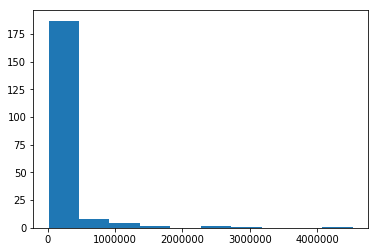

In [52]:
plt.hist(df_remove_0.TOTALPAY)

### What's wrong with the first row of the DataFrame?

In [17]:
df.meta.iloc[0]

'{\n  "invalidCells" : {\n    "1519001" : "TOTALPAY",\n    "1518998" : "PRIMARYPAY",\n    "1519000" : "RUNOFFPAY",\n    "1518999" : "GENERALPAY",\n    "1518994" : "OFFICECD",\n    "1518996" : "OFFICEDIST",\n    "1518991" : "ELECTION"\n  }\n}'

### The first row has invalid cells in the meta data and then lists the column names for some values. This is problematic as an entry.

## Summary

Congratulations! You've started exploring some more complicated data structures used for the web and got to practice data munging and exploring!